In [3]:
import numpy as np
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy
from sklearn.cluster import KMeans
from scipy.sparse import csr_matrix
import scanpy as sc
import scipy

In [4]:
sc.settings.verbosity = 3 

In [5]:
adata = ad.read_h5ad("/Users/apple/Desktop/KB/data/BiddyData/biddy_10215_2000.h5ad")

In [18]:
adata.shape

(10215, 2000)

#### Log Histogram Plot

In [6]:
value_counts = adata.obs['clone_id'].value_counts()

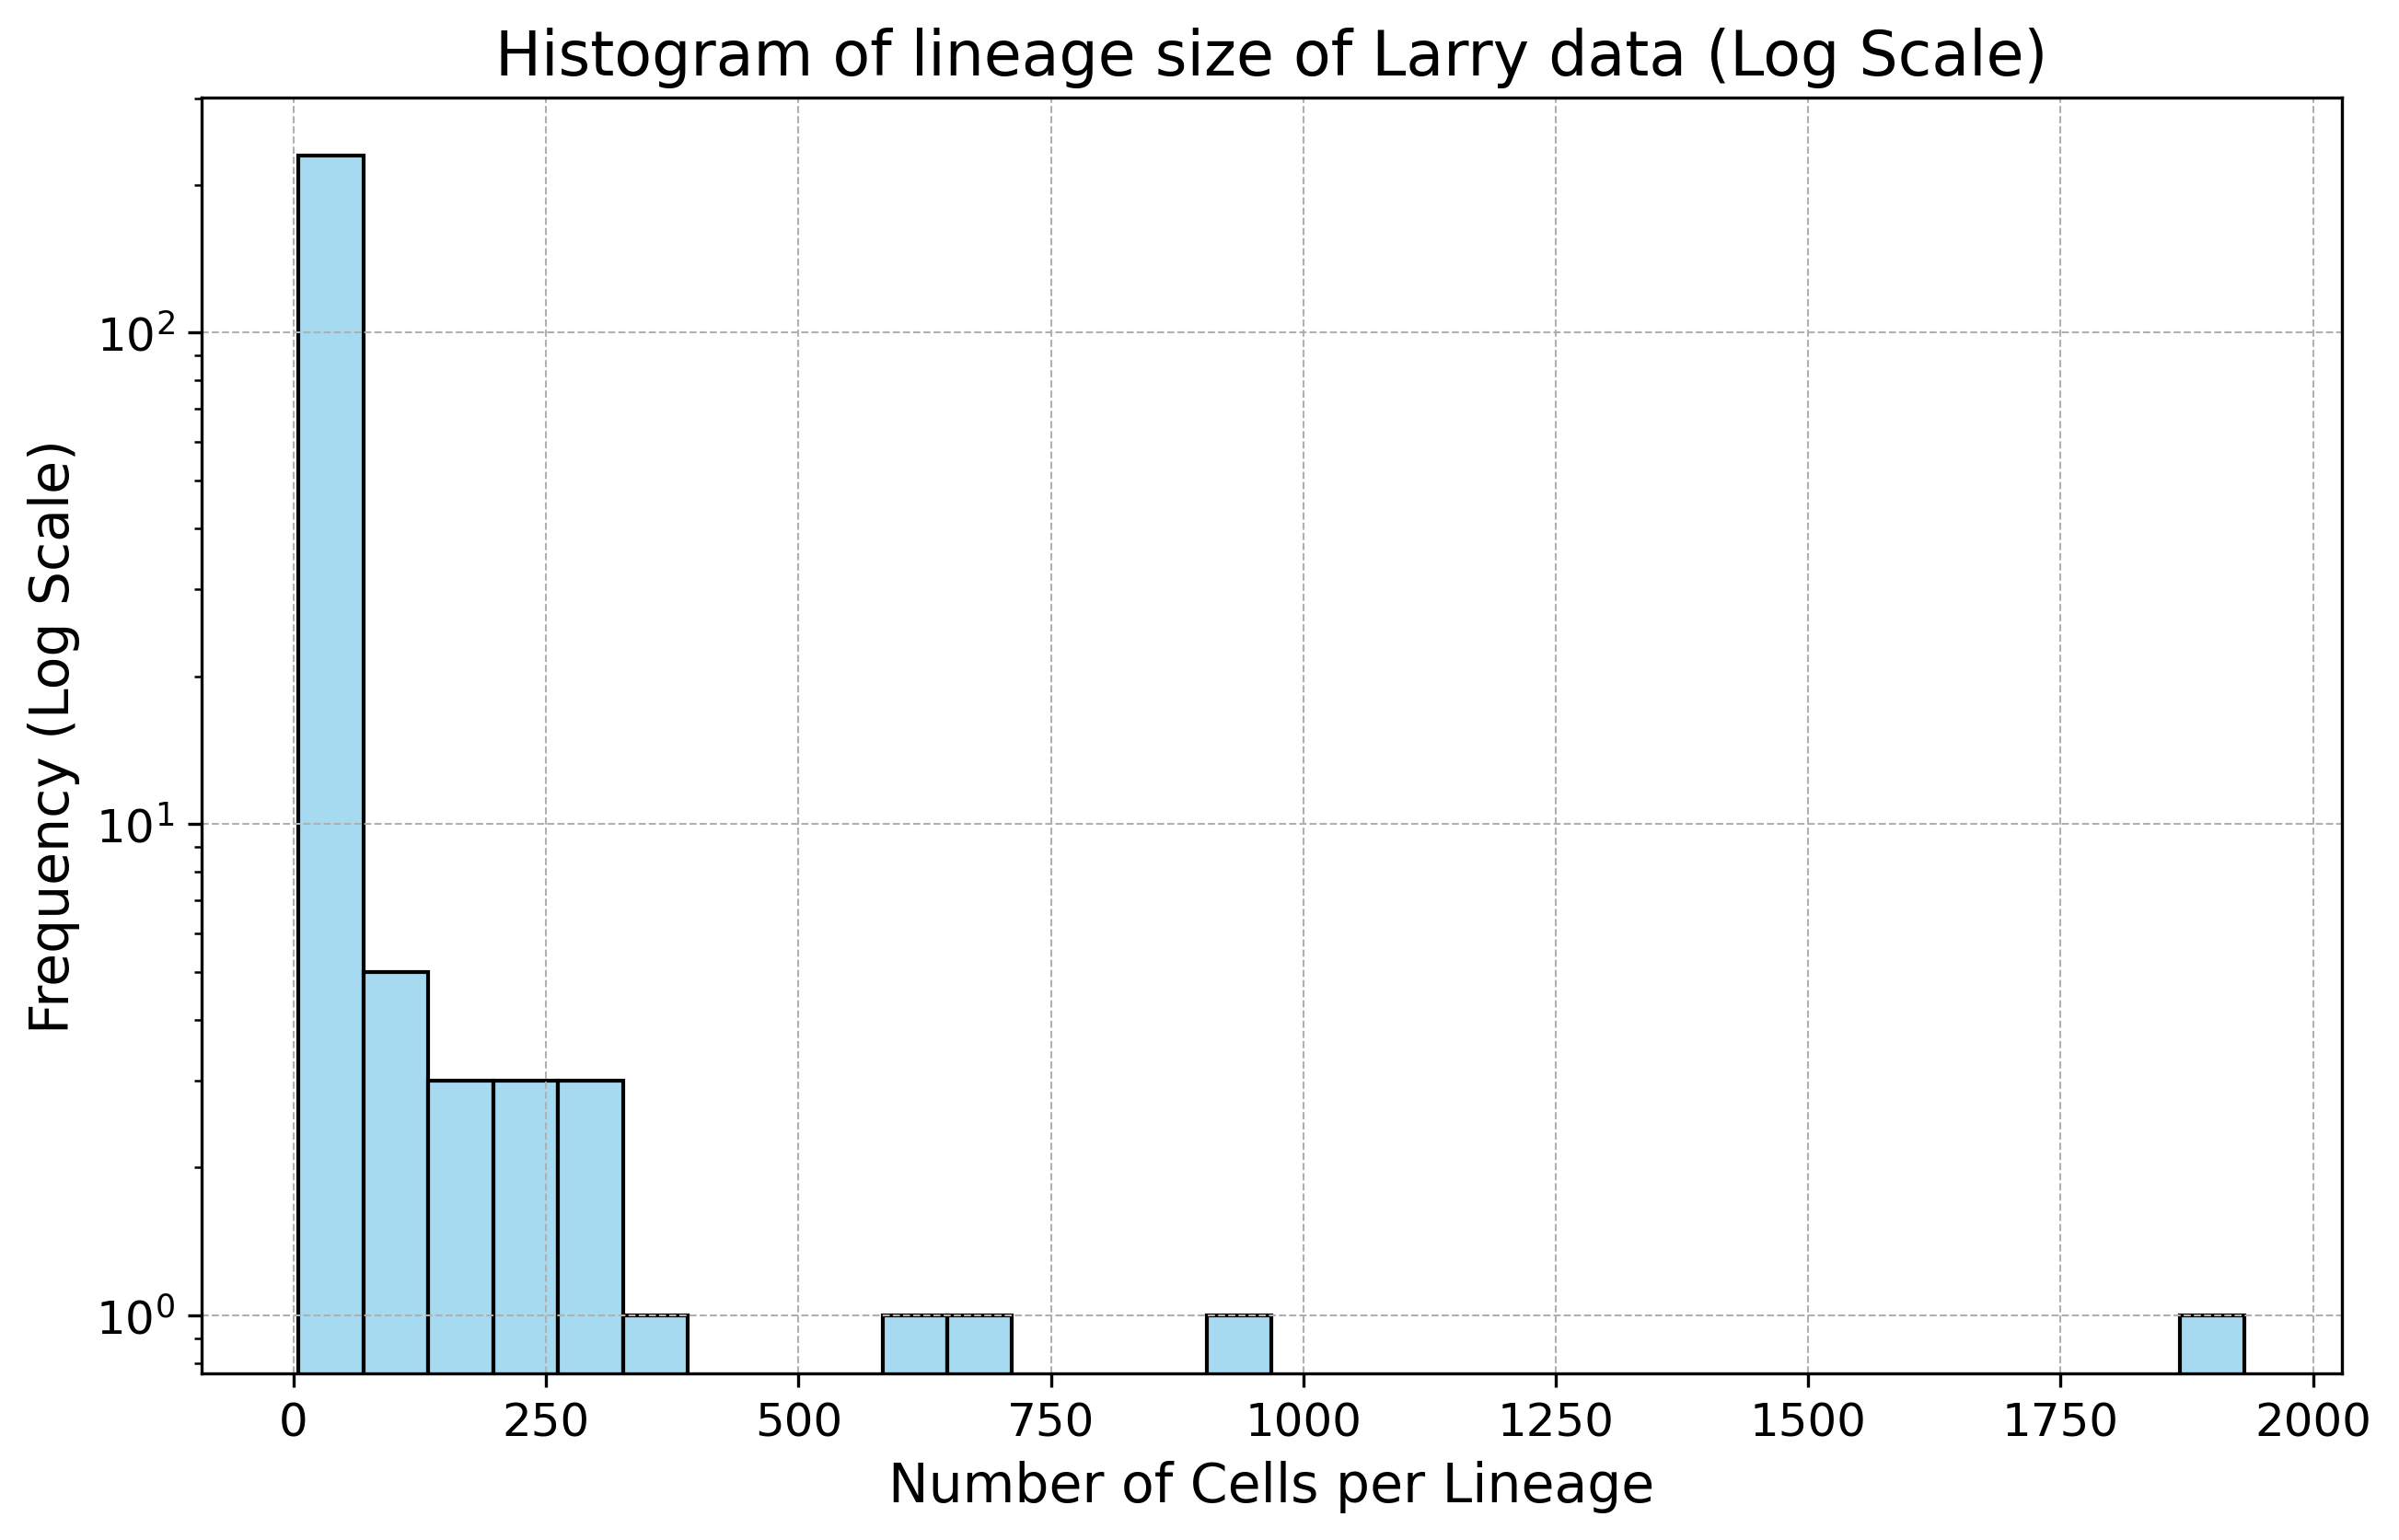

In [8]:
# Set up the figure with higher DPI
plt.figure(figsize=(10, 6), dpi=300)

# Plot the histogram using Seaborn with log scale
sns.histplot(value_counts, bins=30, kde=False, color='skyblue', edgecolor='black')
plt.yscale('log')
plt.title('Histogram of lineage size of Biddy data (Log Scale)', fontsize=16)
plt.xlabel('Number of Cells per Lineage', fontsize=14)
plt.ylabel('Frequency (Log Scale)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Save the figure with high quality if needed
plt.savefig("clone_id_value_counts_histogram_log_scale.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


#### Time point

In [22]:
# Get the value counts of 'Time point'
adata.obs['Time point Day'] = "Day_"+ adata.obs['reprogramming_day'].astype(str)
time_point_counts = adata.obs['Time point Day'].value_counts()

In [23]:
time_point_counts

Time point Day
Day_28    3606
Day_21    2678
Day_15    1863
Day_12    1617
Day_9      421
Day_6       30
Name: count, dtype: int64

In [24]:
time_point_counts/10215

Time point Day
Day_28    0.353010
Day_21    0.262163
Day_15    0.182379
Day_12    0.158297
Day_9     0.041214
Day_6     0.002937
Name: count, dtype: float64

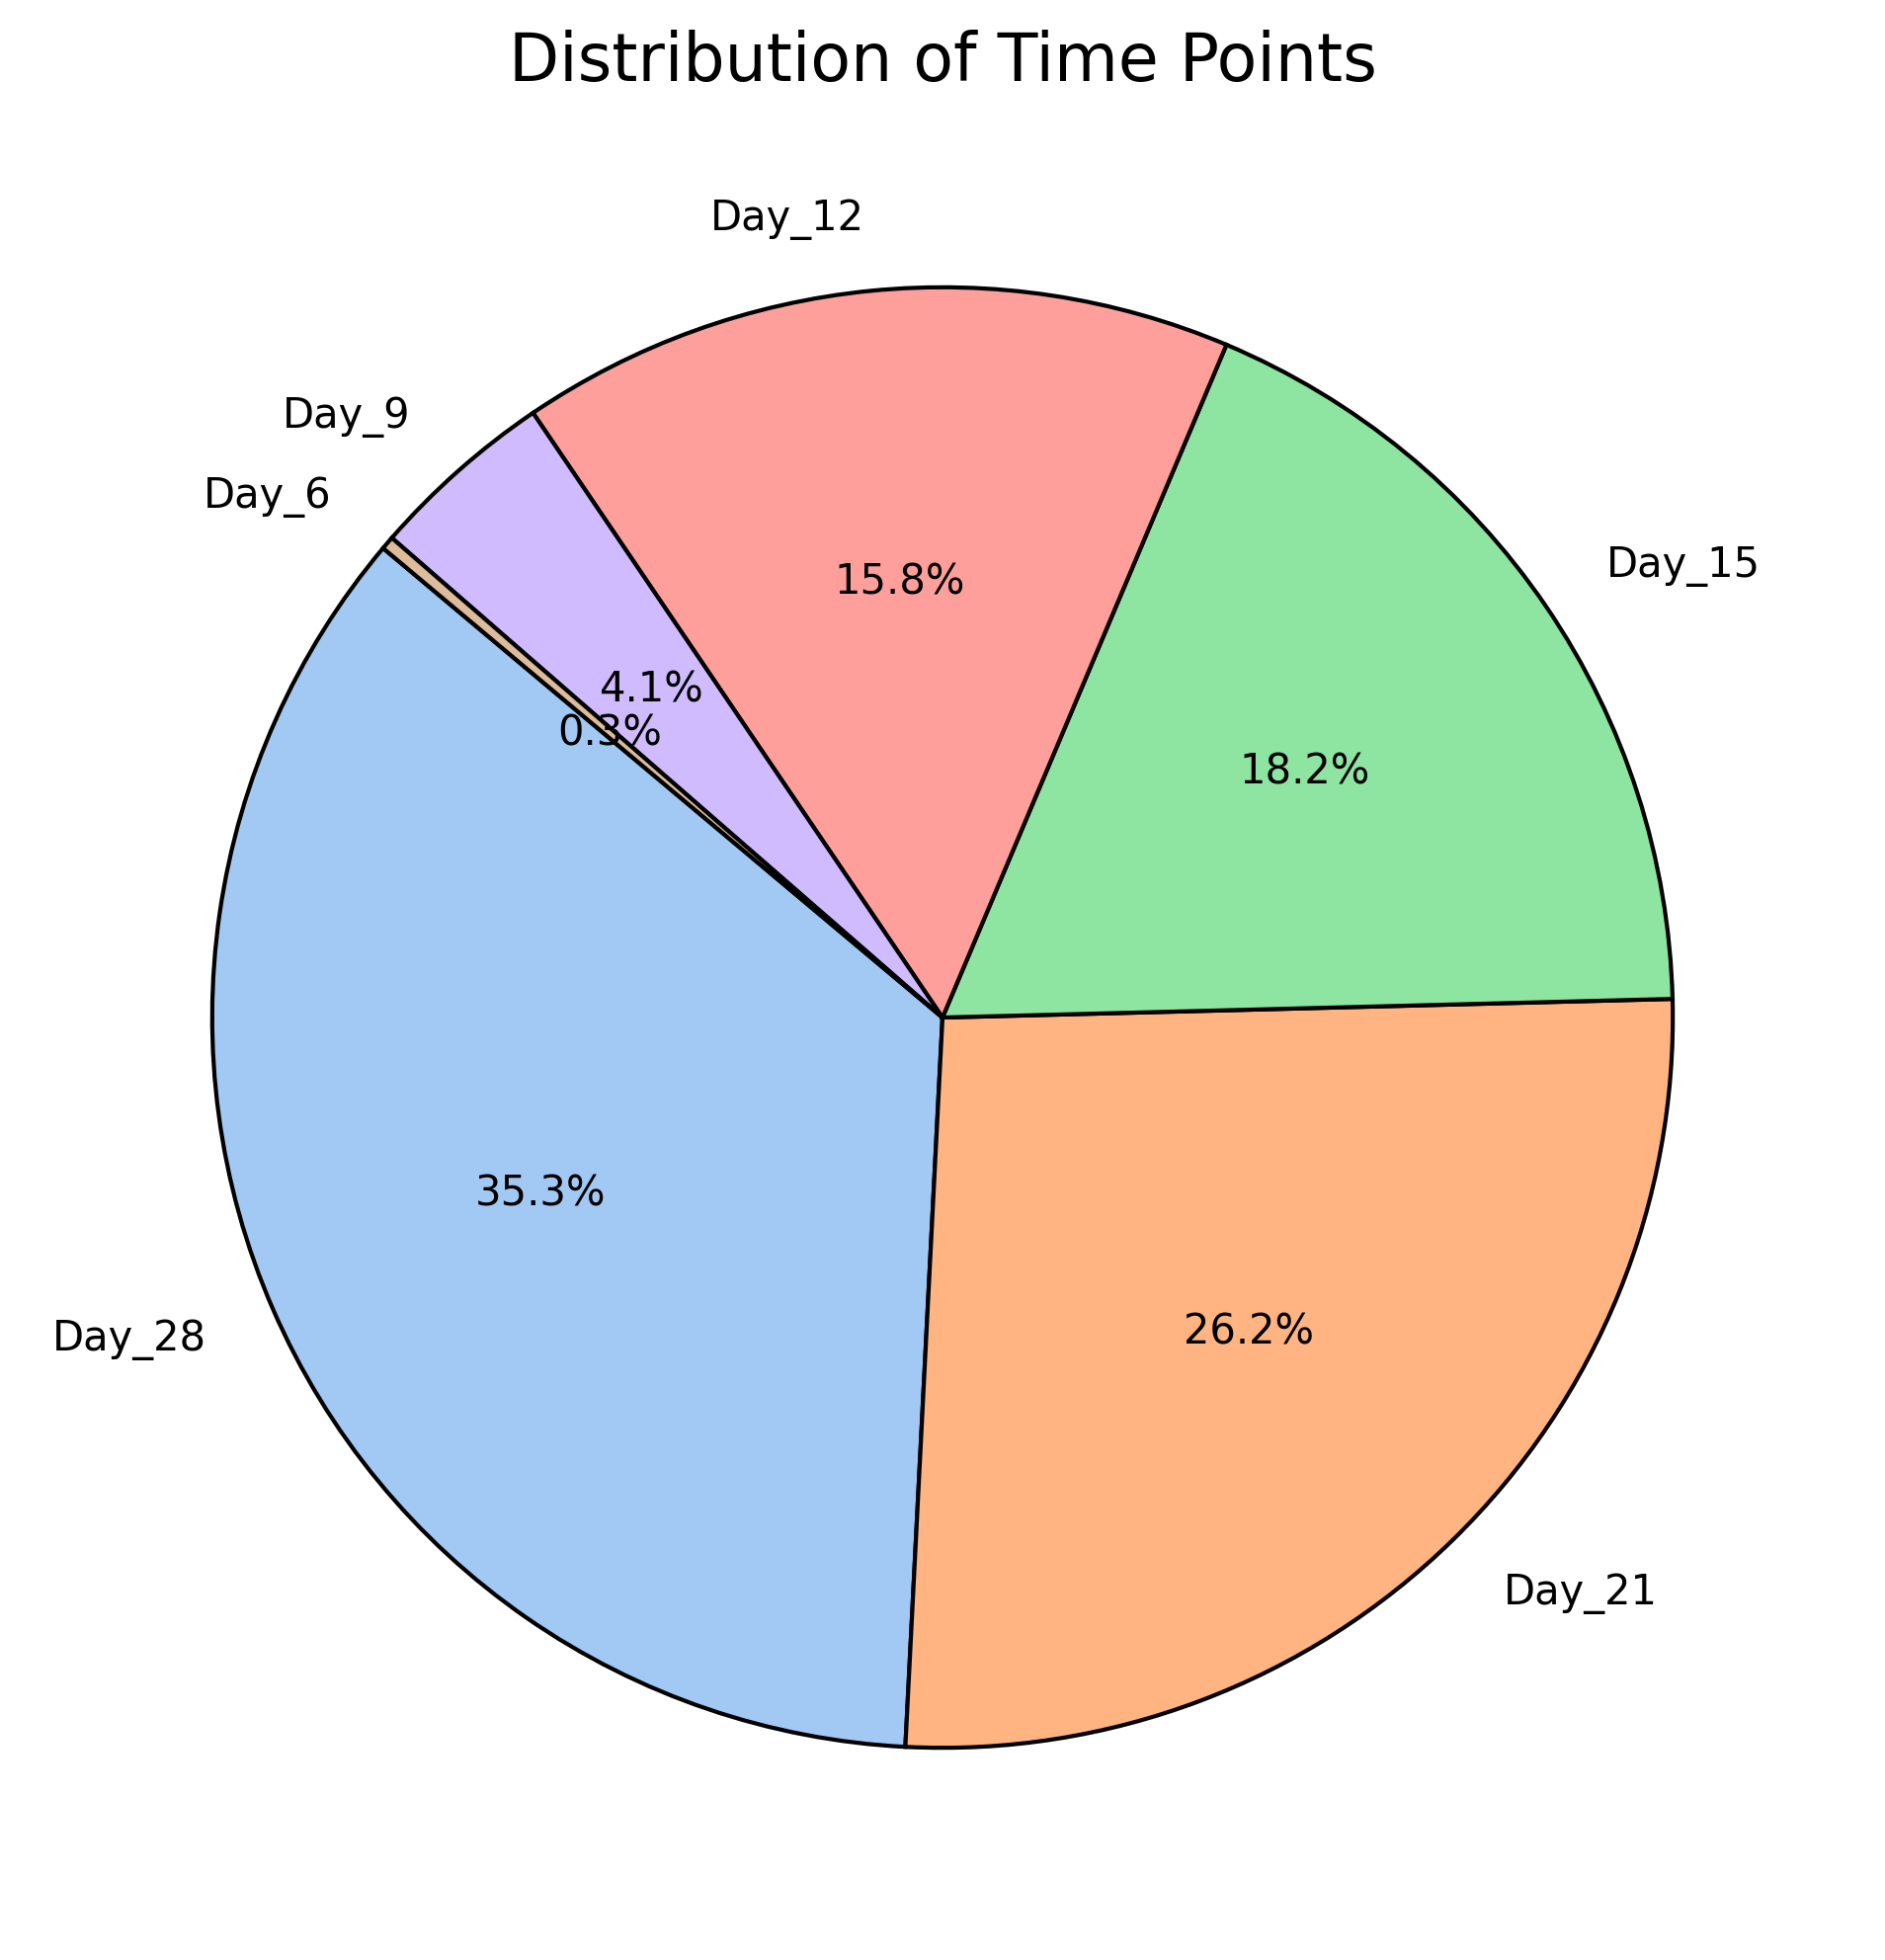

In [25]:
# Set up the figure with higher DPI and better quality
plt.figure(figsize=(8, 8), dpi=300)

# Use Seaborn color palette
colors = sns.color_palette("pastel", len(time_point_counts))

# Plot the pie chart
plt.pie(time_point_counts, labels=time_point_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.savefig("DistributionofTime.png", dpi=300, bbox_inches='tight')
plt.title('Distribution of Time Points', fontsize=16)
plt.show()


#### Cell Type

In [ ]:


# Set up the figure with higher DPI
plt.figure(figsize=(10, 6), dpi=300)

# Plot the histogram using Seaborn with better quality
sns.histplot(value_counts, bins=30, kde=False, color='skyblue', edgecolor='black')
plt.title('Histogram of lineage size of Larry data', fontsize=16)
plt.xlabel('Number of Cells per Lineage', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Save the figure with high quality if needed
plt.savefig("clone_id_value_counts_histogram.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [15]:
adata.obs['Cell type annotation'] = adata.obs["cell_type"]
adata.obs['Cell type annotation'] = adata.obs['Cell type annotation'].cat.add_categories('Non Differentiated')
# Replace NaN values with 'Non Differentiated'
adata.obs['Cell type annotation'].fillna('Non Differentiated', inplace=True)

state_info = adata.obs['Cell type annotation'].value_counts()

/var/folders/ql/mhz506t52bjgn30w6f4wqhv40000gn/T/ipykernel_13591/4028923281.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adata.obs['Cell type annotation'].fillna('Non Differentiated', inplace=True)


In [20]:
state_info

Cell type annotation
iEP                   3782
Non Differentiated    3425
Fibroblast            1584
Ambiguous             1424
Name: count, dtype: int64

In [19]:
state_info/10215

Cell type annotation
iEP                   0.370240
Non Differentiated    0.335291
Fibroblast            0.155066
Ambiguous             0.139403
Name: count, dtype: float64

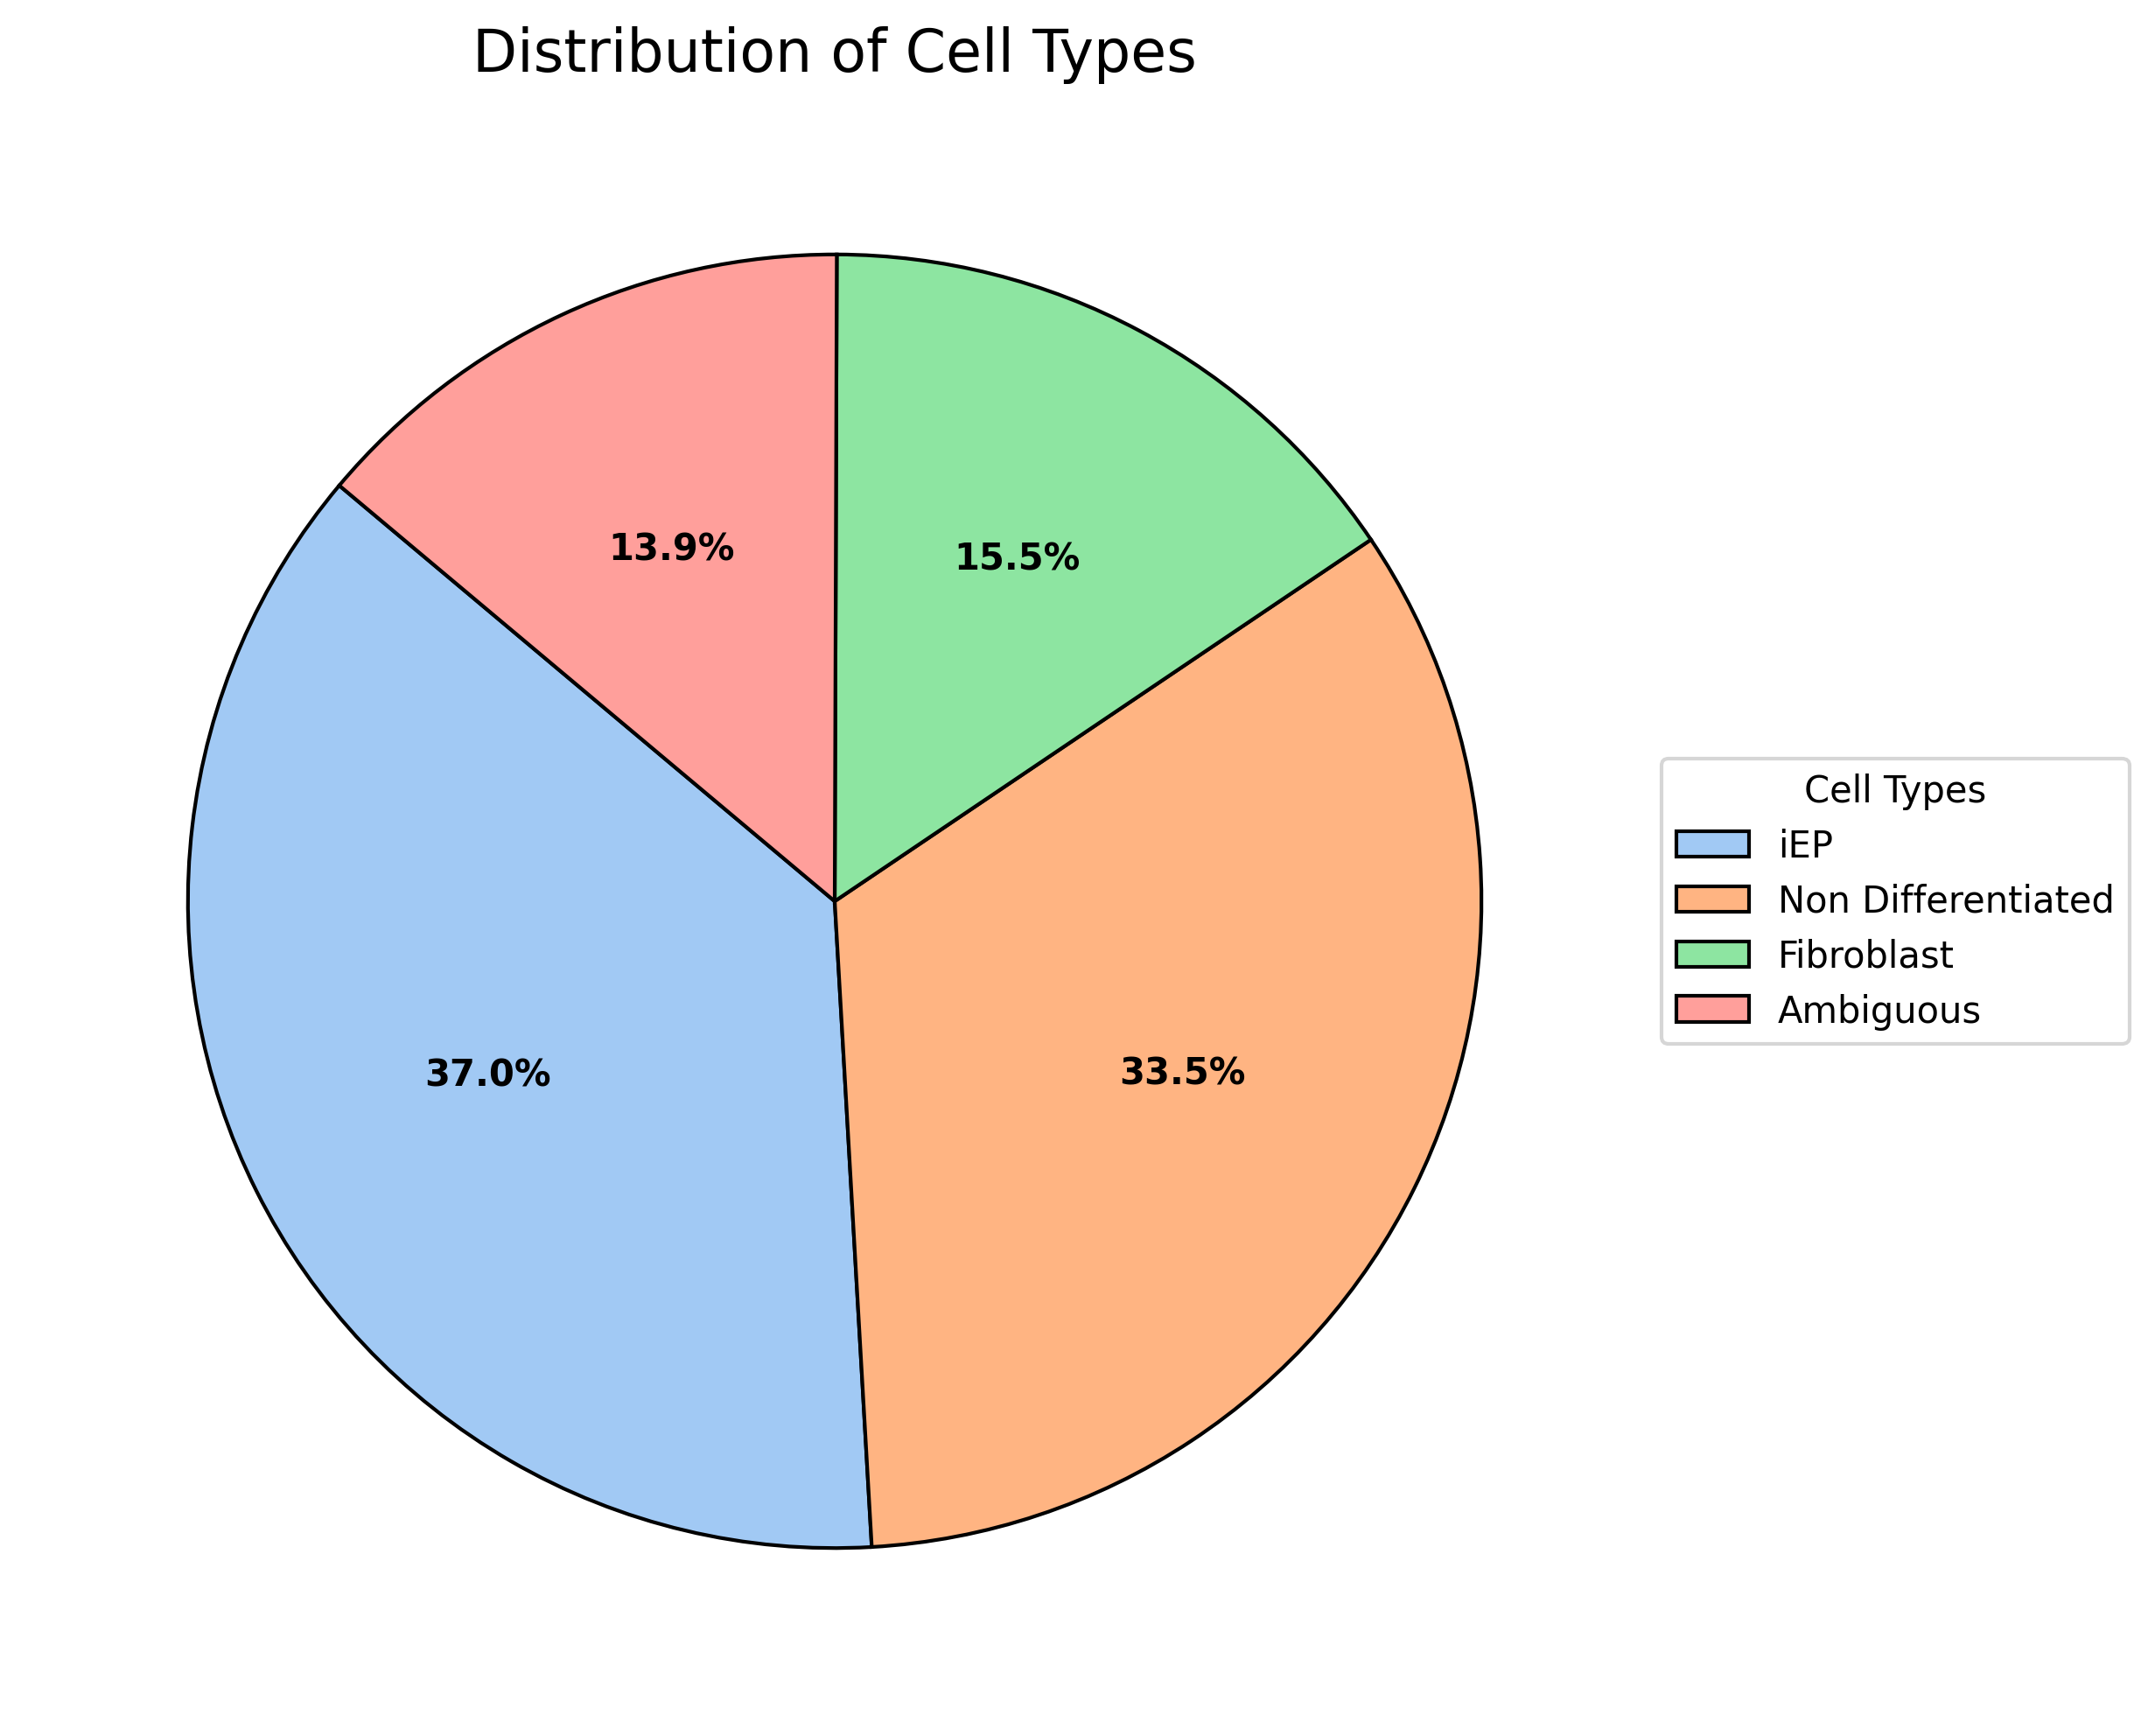

In [16]:
# Function to only show percentages above a certain threshold
def autopct_threshold(pct, threshold=2.1):
    return ('%1.1f%%' % pct) if pct >= threshold else ''

# Get the value counts


# Set up the figure with higher DPI and better quality
plt.figure(figsize=(8, 8), dpi=300)

# Use Seaborn color palette
colors = sns.color_palette("pastel", len(state_info))

# Plot the pie chart with the custom autopct function
wedges, texts, autotexts = plt.pie(state_info, labels=None, autopct=lambda pct: autopct_threshold(pct), startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

# Add a legend outside the pie chart
plt.legend(wedges, state_info.index, title="Cell Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribution of Cell Types', fontsize=16)

# Adjust font size for better readability
plt.setp(autotexts, size=10, weight="bold")
plt.setp(texts, size=10)

# Save the figure
# plt.savefig("DistributionofCellTypes.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
adata_hvgene = ad.read_h5ad("/Users/apple/Desktop/KB/data/LarryData/Larry_41093_2000_norm_log.h5ad")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to only show percentages above a certain threshold
def autopct_threshold(pct, threshold=2.1):
    return ('%1.1f%%' % pct) if pct >= threshold else ''

# Get the value counts
state_info = adata_hvgene.obs['state_info'].value_counts()

# Set up the figure with higher DPI and better quality
plt.figure(figsize=(8, 8), dpi=300)

# Use Seaborn color palette
colors = sns.color_palette("pastel", len(state_info))

# Plot the pie chart with the custom autopct function
wedges, texts, autotexts = plt.pie(state_info, labels=None, autopct=lambda pct: autopct_threshold(pct), startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

# Add a legend outside the pie chart
plt.legend(wedges, state_info.index, title="Cell Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribution of Cell Types', fontsize=16)

# Adjust font size for better readability
plt.setp(autotexts, size=10, weight="bold")
plt.setp(texts, size=10)

# Save the figure
plt.savefig("DistributionofCellTypes.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
